In [33]:
#!pip3 install numpy
#!pip3 install pandas
#!pip3 install scanpy

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import shortest_path as sp
import sc_pca
import random
import check_coords

# dir = "/Users/ozgun/Data/Josh/"
dir = "/home/ozgun/Data/Josh/"
data_file = dir + "normalized_mat.tsv"
data_file_denoised = dir + "normalized_denoised_mat.tsv"
pca_pre_file = dir + "pca_coords_8.tsv"
pca_file = dir + "pca_8.tsv"
pca_pre_file_2D = dir + "pca_coords_2.tsv"
pca_file_2D = dir + "pca_2.tsv"
umap_coords = dir + "umap_coords.tsv"
umap_file = dir + "umap.tsv"
dist_euc_file = dir + "dist_euclidean.tsv"
dist_cos_file = dir + "dist_cosine.tsv"
dist_cos_asis_file = dir + "dist_cosine_asis.tsv"
dist_um_file = dir + "dist_umap.tsv"
diffexp_file = dir + "diffexp_cosine.tsv"
metadata_file = dir + "meta_data.tsv"

In [8]:

#sc_pca.sc_pca(data_file, pca_file, 10)
sp.write_distance_matrix(pca_file, dist_euc_file)

In [2]:
sp.write_cosine_distance_matrix(pca_file, dist_cos_asis_file)

In [9]:
sp.write_distance_matrix(umap_file, dist_um_file)

In [34]:
sp.transpose_table(pca_pre_file_2D, pca_file_2D)

In [8]:
sp.transpose_table(umap_coords, umap_file)

In [2]:
sp.k_rank_svd(data_file, 50, data_file_denoised)

In [2]:
distF_cosine_asis = pd.read_table(dist_cos_asis_file, index_col=0)
distF_cosine = pd.read_table(dist_cos_file, index_col=0)
distF_euc = pd.read_table(dist_euc_file, index_col=0)
distF_um = pd.read_table(dist_um_file, index_col=0)

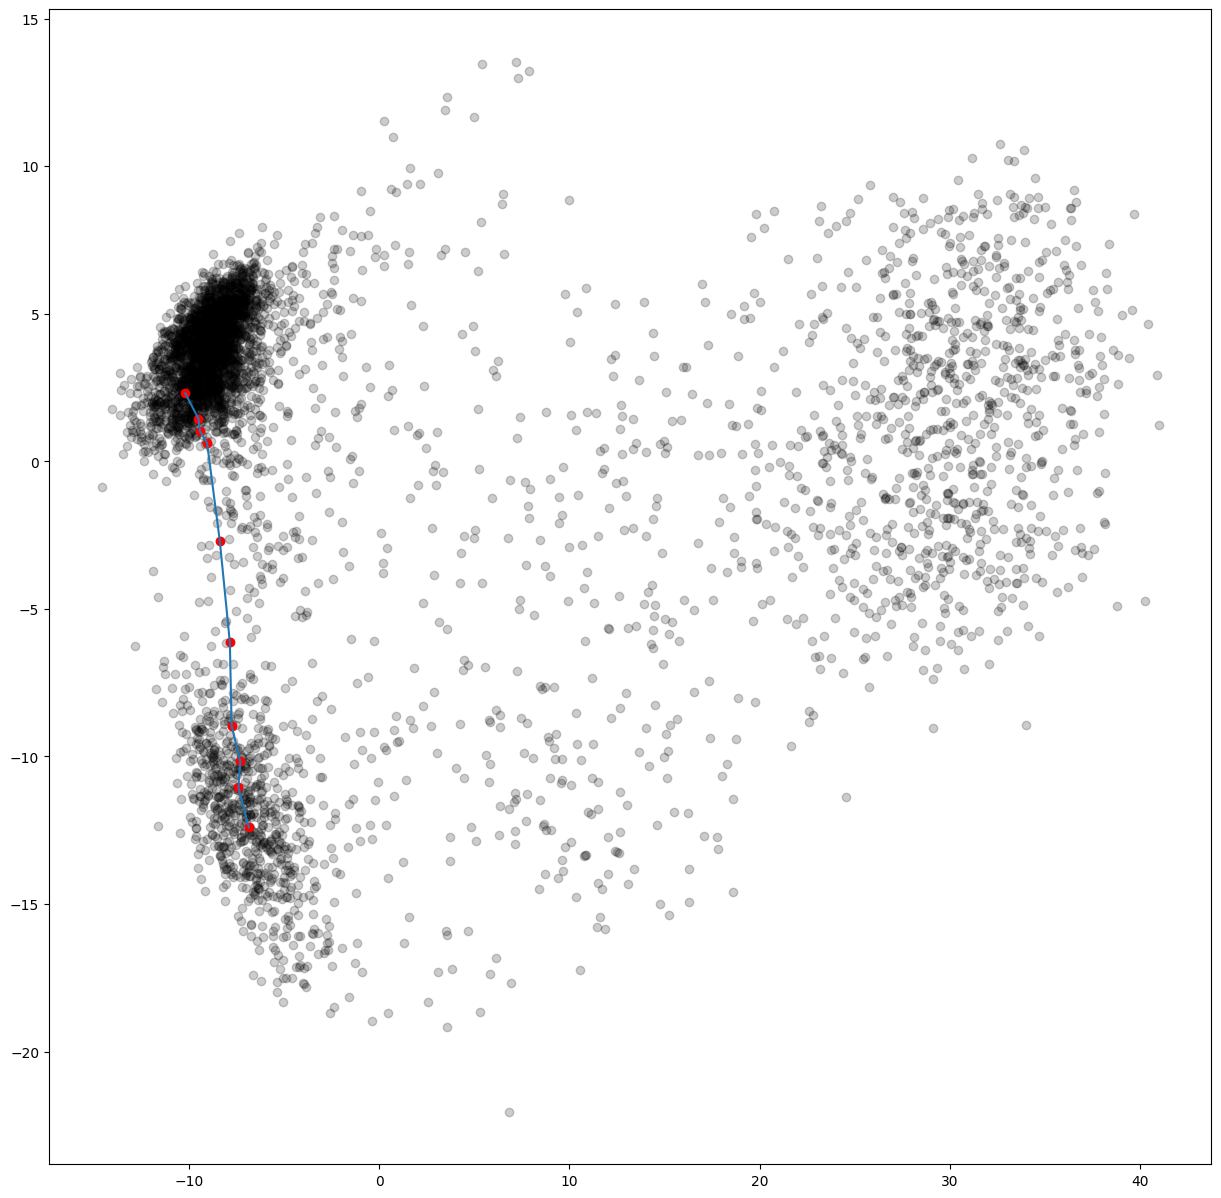

In [39]:

table = pd.read_table(pca_file_2D, index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(15, 15))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

# traj, time = sp.get_traj_and_time_from_dataframe(distF_euc, "midpoint_AACACGTTCGGCGCTA-1", "tumor_GGGCATCAGTGTACCT-1") # 892-to-45
# traj, time = sp.get_traj_and_time_from_dataframe(distF_euc, "midpoint_TGGTTCCTCACTATTC-1", "tumor_GGGCATCAGTGTACCT-1") # 1 to 45
traj, time = sp.get_traj_and_time_from_dataframe(distF_euc, "midpoint_AACACGTTCGGCGCTA-1", "midpoint_TGGTTCCTCACTATTC-1") # 892 to 1

line = check_coords.get_line_map(traj, pca_pre_file_2D)

ax.plot(line[0], line[1])
ax.scatter(line[0], line[1], color = 'r', alpha=1)

sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/892-to-1-euc.tsv")

plt.show()

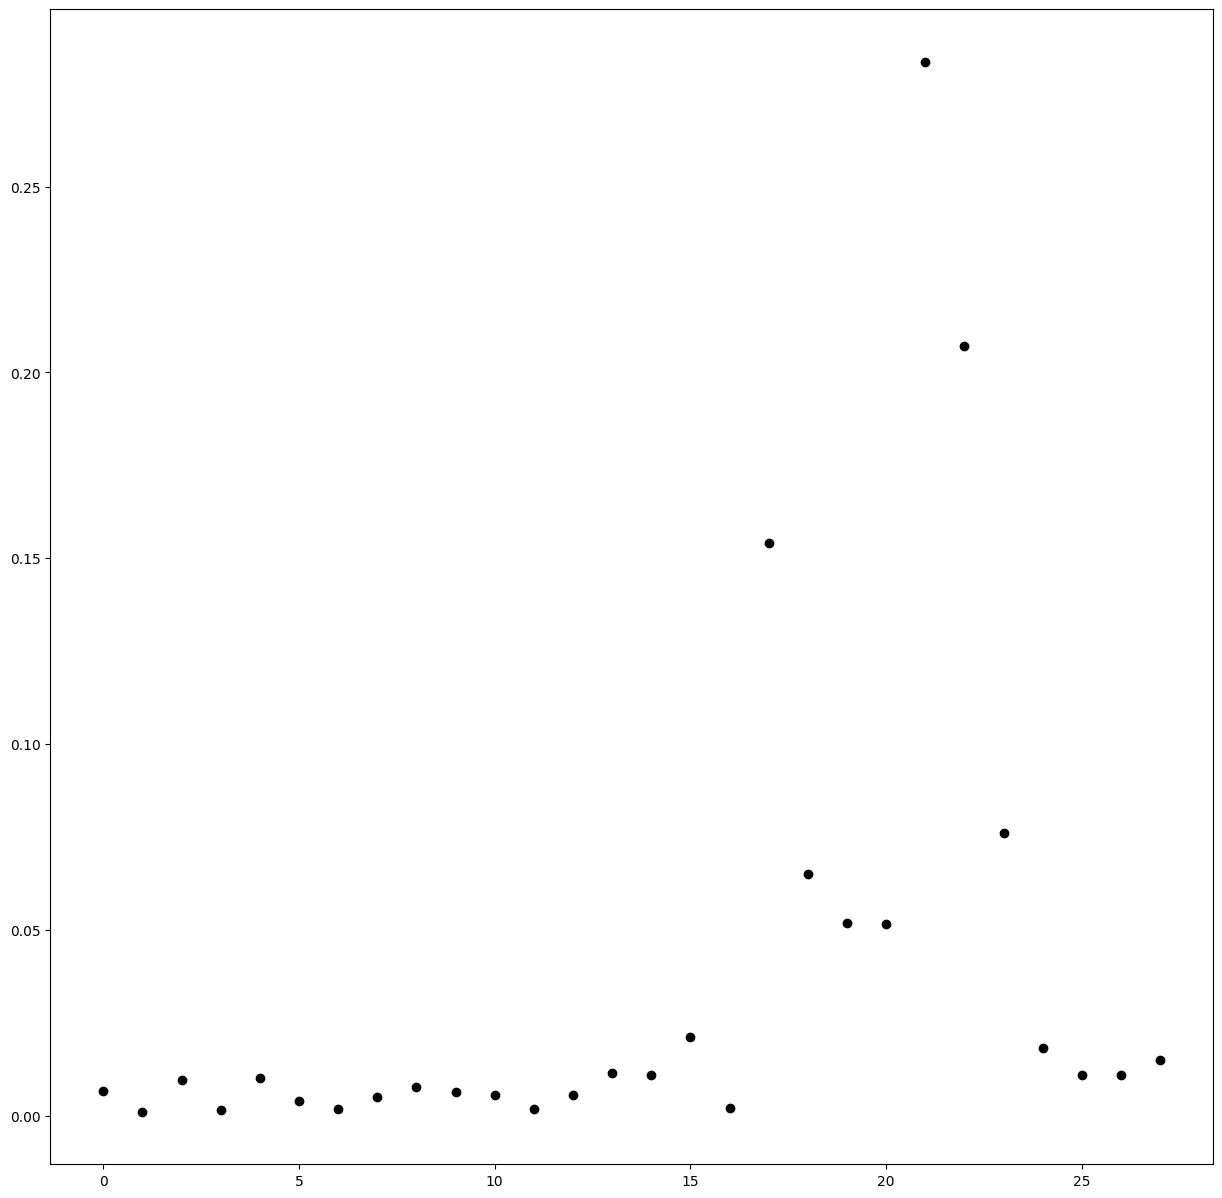

In [32]:
plt.figure(figsize=(15, 15))
ax = plt.axes()

v2 = sp.get_consecutive_distances(distF_cosine_asis, traj)
v1 = [*range(0, len(v2))]

ax.scatter(v1, v2, color = 'k', alpha=1)


midpoint_AACACGTTCGGCGCTA-1


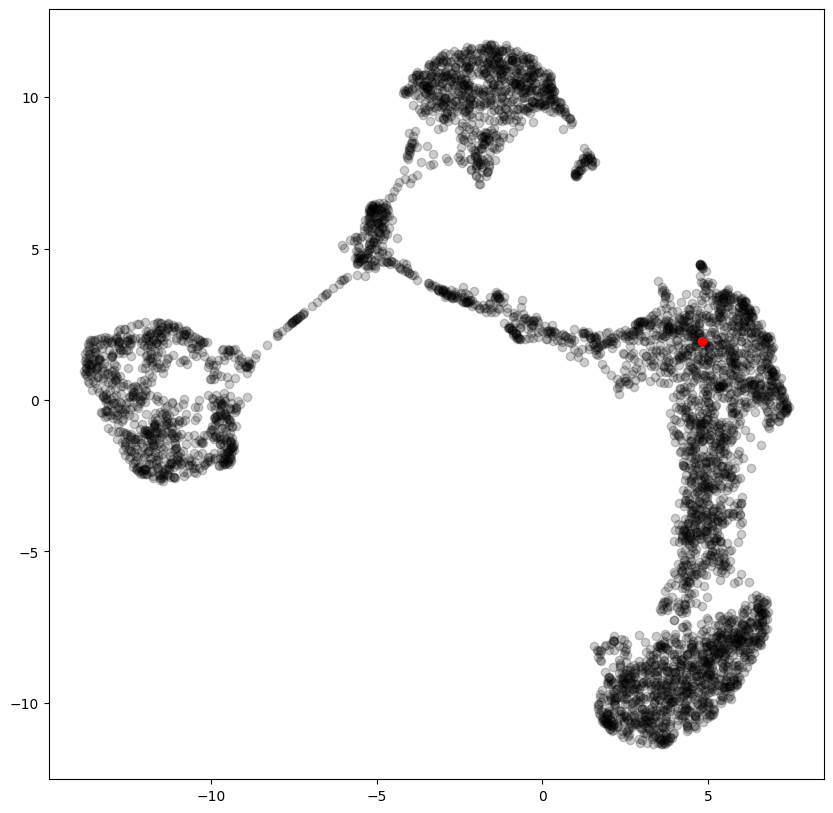

In [25]:
df = pd.read_table(metadata_file)
dic = df.set_index("cell_ID")["seurat_clusters"].to_dict()
subset = set([k for k,v in dic.items() if v == 2 or v == 8 or v == 9])

table = pd.read_table(umap_file, index_col=0)
mat = table.to_numpy()
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(mat[0], mat[1], color = 'k', alpha=0.2)

closest = sp.get_cell_closest_to_the_average_loc(pca_file, subset)
print(closest)
traj = [closest]

line = check_coords.get_line_map(traj, umap_coords)

ax.plot(line[0], line[1])
ax.scatter(line[0], line[1], color = 'r', alpha=1)

# sp.write_changes(data_file_denoised, traj, time, dir + "/diffexp/1-to-6-cosine.tsv")

plt.show()


In [36]:
subset = ["tumor_TCAGGTATCAATAAGG-1", "tumor_CTACCCAAGGAGTTTA-1"]
dataF = pd.read_table(pca_file, index_col=0)
mid = np.zeros(len(dataF))
for cell in subset:
    print(dataF[cell].to_numpy())
    mid += dataF[cell].to_numpy()
mid /= len(subset)

mid

[ 12.1696927    3.45703508  -2.59409743  -3.47857367 -12.86713696
  -9.25625368  -6.48957547  -5.73074966]
[ 27.88930997   5.70561084 -10.59224075  -2.70611593 -16.81007354
   6.99605739  -0.92998825  -9.30446182]


array([ 20.02950134,   4.58132296,  -6.59316909,  -3.0923448 ,
       -14.83860525,  -1.13009815,  -3.70978186,  -7.51760574])